In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))

import re
import string
from tqdm import tqdm
tqdm.pandas()

import numpy as np

In [4]:
import pandas as pd
df_train = pd.read_csv("gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/train.csv")
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df_sample_submission = pd.read_csv("gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/sample_submission.csv")
df_sample_submission.head(2)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5


In [6]:
df_test_labels = pd.read_csv("gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/test_labels.csv")
df_test_labels.head(2)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1


In [7]:
df_test = pd.read_csv("gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/test.csv")
df_test.head(2)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


In [8]:
df_train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [9]:
print(df_train["comment_text"].iloc[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [10]:
df_train[df_train["toxic"] != 0 ].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [11]:
df_train["toxic"].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [12]:
print("toxic: ", df_train[df_train["toxic"] == 1].shape,  df_train[df_train["toxic"] == 1 ].shape[0]/df_train.shape[0])

print("severe_toxic: ", df_train[df_train["severe_toxic"] == 1 ].shape,  df_train[df_train["severe_toxic"] == 1 ].shape[0]/df_train.shape[0])

print("obscene: ", df_train[df_train["obscene"] == 1 ].shape,  df_train[df_train["obscene"] == 1 ].shape[0]/df_train.shape[0])

print("threat: ", df_train[df_train["threat"] == 1 ].shape,  df_train[df_train["threat"] == 1 ].shape[0]/df_train.shape[0])

print("insult: ", df_train[df_train["insult"] == 1 ].shape,  df_train[df_train["insult"] == 1 ].shape[0]/df_train.shape[0])

print("identity_hate: ", df_train[df_train["identity_hate"] == 1 ].shape,  df_train[df_train["identity_hate"] == 1 ].shape[0]/df_train.shape[0])

toxic:  (15294, 8) 0.09584448302009764
severe_toxic:  (1595, 8) 0.009995550569965721
obscene:  (8449, 8) 0.052948217407925
threat:  (478, 8) 0.002995531769557125
insult:  (7877, 8) 0.04936360616904074
identity_hate:  (1405, 8) 0.00880485802558109


In [13]:
df_train.shape

(159571, 8)

## ** Note: Find the reason of classification **

### **EDA** 

In [14]:
print("Check for missing values in Train dataset")
print(df_train.isnull().sum())

# There is no missing vales in the Train Data

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [15]:
print("Check for missing values in Test dataset")
print(df_test.isnull().sum())

# There is no missing vales in the Test Data

Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64


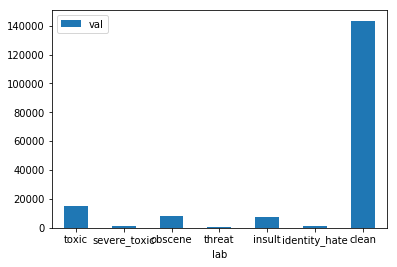

In [16]:
df = pd.DataFrame({'lab':['toxic', 'severe_toxic', 'obscene', "threat", "insult", "identity_hate", "clean"], 
                   'val':[15294, 1595, 8449, 478, 7877, 1405, 143346]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [17]:
df_train[(df_train["toxic"] ==0) & (df_train["severe_toxic"] ==0) & (df_train["obscene"] ==0) & (df_train["threat"] ==0) & \
         (df_train["insult"] ==0) & (df_train["identity_hate"] ==0)].shape

(143346, 8)

In [0]:
df_train["sum"] = df_train.sum(axis=1)

In [19]:
df_train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,0


In [20]:
import collections
counter=collections.Counter(list(df_train["sum"]))
counter

Counter({0: 143346, 1: 6360, 2: 3480, 3: 4209, 4: 1760, 5: 385, 6: 31})

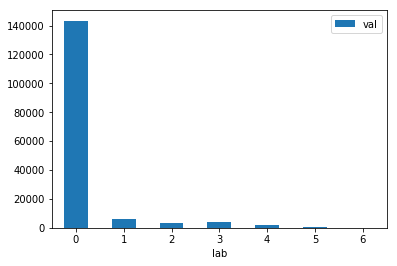

In [21]:
df = pd.DataFrame({'lab':['0', '1', '2', "3", "4", "5", "6"], 
                   'val':[143346, 6360, 3480, 4209, 1760, 385, 31]})
ax = df.plot.bar(x='lab', y='val', rot=0,)

In [0]:
del df_train["sum"]

In [23]:
df_train.corr(method ='pearson').style.background_gradient()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1,0.403014,0.123601,0.375807,0.2016
obscene,0.676515,0.403014,1,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1,0.337736
identity_hate,0.266009,0.2016,0.286867,0.115128,0.337736,1


In [24]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [25]:
df_train[df_train["severe_toxic"] == 1].head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0


In [26]:
for elem in df_train[df_train["identity_hate"] == 1].comment_text.head(30):
    print(elem, "\n ==============\n\n\n")

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side! 



A pair of jew-hating weiner nazi schmucks. 



I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms 



Kill all niggers. 

I have hard, that others have said this.. should this be included? That racists sometimes say these. 



u r a tw@ fuck off u gay boy.U r smelly.Fu

## **Feature Engineering**

### 1. **Direct features**

Features which are a directly due to words/content.We would be exploring the following techniques

* Word frequency features
    * Count features
    * Bigrams
    * Trigrams
* Vector distance mapping of words (Eg: Word2Vec)
* Sentiment scores

### **Indirect features:**

Some more experimental features.
count of sentences
* count of words
* count of unique words
* count of letters
* count of punctuations
* count of uppercase words/letters
* count of stop words
* Avg length of each word

In [0]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
df_train['comment_text'] = df_train['comment_text'].map(lambda com : clean_text(com))

In [0]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)


In [0]:
## Indirect features

def indirect_features_1(df):
    #Sentense count in each comment:
        #  '\n' can be used to count the number of sentences in each comment
    df['count_sent']=df["comment_text"].progress_apply(lambda x: len(re.findall("\n",str(x)))+1)

    #Word count in each comment:
    df['count_word']=df["comment_text"].progress_apply(lambda x: len(str(x).split()))

    #Unique word count
    df['count_unique_word']=df["comment_text"].progress_apply(lambda x: len(set(str(x).split())))

    #Letter count
    df['count_letters']=df["comment_text"].progress_apply(lambda x: len(str(x)))

    #punctuation count
    df["count_punctuations"] =df["comment_text"].progress_apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

    #upper case words count
    df["count_words_upper"] = df["comment_text"].progress_apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

    #title case words count
    df["count_words_title"] = df["comment_text"].progress_apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

    #Number of stopwords
    df["count_stopwords"] = df["comment_text"].progress_apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

    #Average length of the words
    df["mean_word_len"] = df["comment_text"].progress_apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
    #derived features
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #derived features
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    
    return df

In [29]:
df_train = indirect_features_1(df_train)

100%|██████████| 159571/159571 [00:04<00:00, 32527.97it/s]


In [30]:
df_train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,1,50,45,264,0,0,0,23,4.3,90.0,0.0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,1,20,20,103,0,0,0,6,4.2,100.0,0.0


### **Leaky features:**

From the example, we know that the comments contain identifier information (eg: IP, username,etc.). We can create features out of them but, it will certainly lead to overfitting to this specific Wikipedia use-case.

* toxic IP scores
* toxic users

**Note:** Creating the indirect and leaky features first. There are two reasons for this,

* Count features(Direct features) are useful only if they are created from a clean corpus
* Also the indirect features help compensate for the loss of information when cleaning the dataset


In [0]:
# ### Processiing pipeline 

# def processing_all_data_frames(df_change):
#     df_change['comment_text'] = df_change['comment_text'].map(lambda com : clean_text(com))
#     df_change = indirect_features_1(df_change)
#     return df_change

In [0]:
### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
X = df_train.comment_text
test_X = df_test.comment_text

In [35]:
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [36]:
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2642044 stored elements in Compressed Sparse Row format>

In [41]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

# create submission file

sample_submission_path = "gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/sample_submission.csv"
submission_binary = pd.read_csv(sample_submission_path)

for label in cols_target:
    print('... Processing {}'.format(label))
    y = df_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy is 0.9832300355327722
... Processing insult
Training accuracy is 0.9755469352200588
... Processing toxic
Training accuracy is 0.9639846839337975
... Processing severe_toxic
Training accuracy is 0.9920850279812748
... Processing identity_hate
Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453


In [0]:
out_submission_path = "gdrive/My Drive/Learning/Sentiment_classifier/jigsaw-toxic-comment-classification-challenge/submission_binary.csv"
submission_binary.to_csv(out_submission_path, index=False)